In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def init_clean(filename="Vacacionista.csv"):
    d=pd.read_csv(filename, encoding='latin-1')
    print("init",d.shape)
    d.drop(d.columns[[0,1,2]],axis=1,inplace=True)
    d.dropna(axis=1, how='all',inplace=True)
    print("end",d.shape)
    return d
data = init_clean()

init (1548, 2509)
end (1548, 1238)


### 48. Cuando realiza un viaje internacional por vacaciones, usualmente. ¿Què actividades son las que más lo motivan a viajar?

Muestra:  1548
Promedio de respuestas contestadas por personas:  3


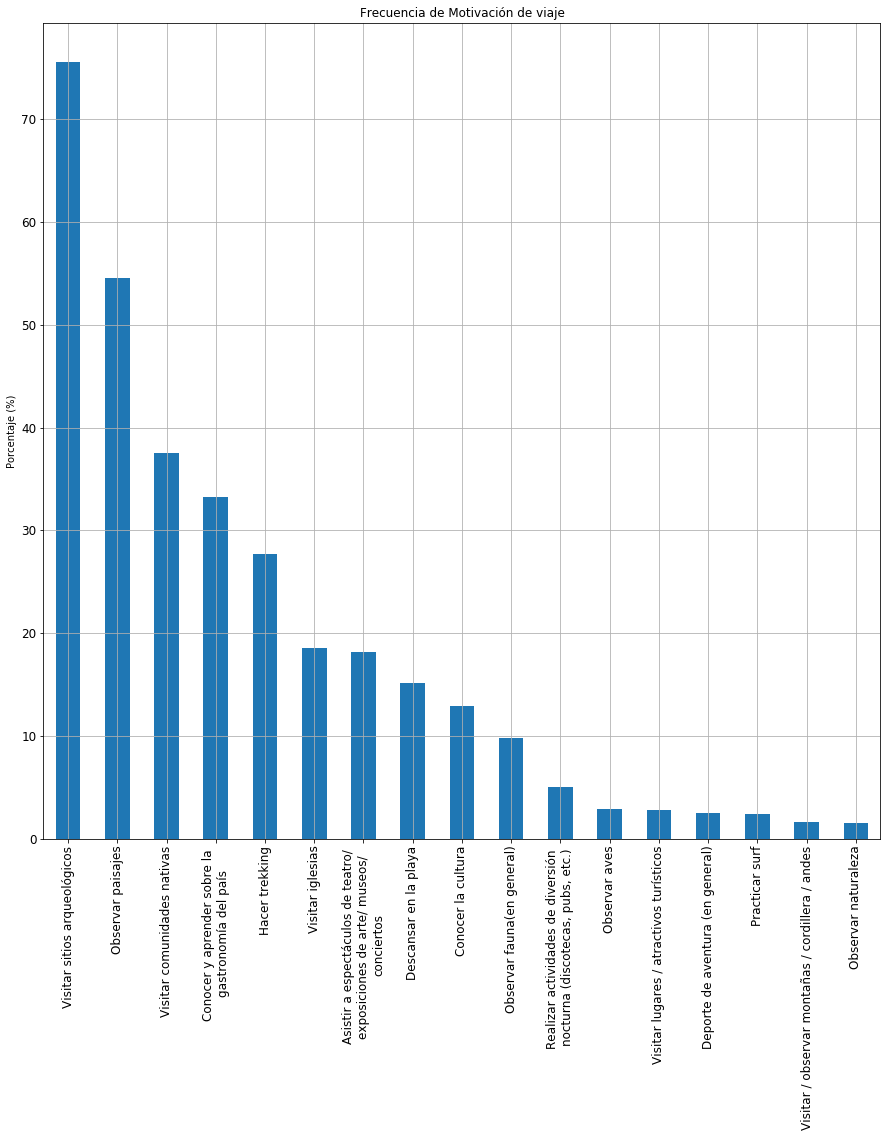

In [15]:
def get_48():
    n=len(data)
    print("Muestra: ", n)
    df_P48_count_values_by_column = data[["P48A_1","P48A_2","P48A_3","P48A_4","P48A_5",]].apply(pd.Series.value_counts)
    df_P48_count_values_sum=df_P48_count_values_by_column.sum(axis=1).sort_values()[::-1]
    df_P48=df_P48_count_values_sum[:43].rename(index={
        1:'Visitar sitios arqueológicos',
        16:'Observar paisajes',
        2:'Visitar comunidades nativas',
        7:'Conocer y aprender sobre la \ngastronomía del país',
        8:'Hacer trekking',
        3:'Visitar iglesias',
        4:'Asistir a espectáculos de teatro/ \nexposiciones de arte/ museos/ \nconciertos',
        6:'Descansar en la playa',
        19:'Conocer la cultura',
        17:'Observar fauna(en general)',
        5:'Realizar actividades de diversión \nnocturna (discotecas, pubs, etc.)',
        18:"Observar aves",
        24:"Visitar lugares / atractivos turísticos",
        31:"Deporte de aventura (en general)",
        9:"Practicar surf",
        30:"Visitar / observar montañas / cordillera / andes",
        43:"Observar naturaleza",
    })
    ((df_P48/n)*100).round(2).plot(
        kind='bar', 
        grid=True, 
        title="Frecuencia de Motivación de viaje",
        figsize=(15, 15),
        fontsize=12,
    ).set(ylabel="Porcentaje (%)")
    print("Promedio de respuestas contestadas por personas: ",round(data.loc[:,'P48A_1':'P48A_5'].notnull().sum(axis=1).mean()))
get_48()


### 54. Con todo lo que usted sabe y la experiencia que ha tenido en su viaje a nuestro país, si sus familiares o amigos desearan viajar al Perú ¿Cuál de las frases que le voy a mostrar se identificaría más con usted? 

Muestra:  1548
Les recomendaría sin ninguna duda que visiten el Perú    1404
Les recomendaría, pero con reservas                       139
Ni se los recomendaría, ni los desanimaría                  3
Los desanimaría                                             2
Name: P54, dtype: int64


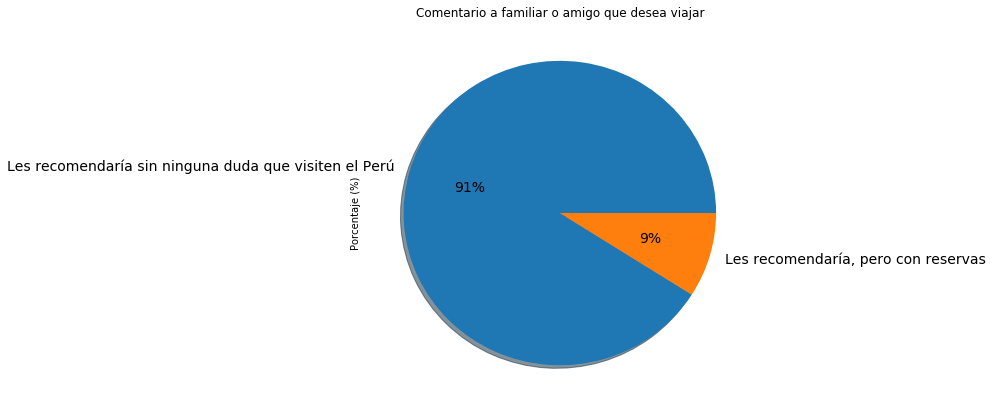

In [3]:
def get_54():
    n=len(data.P54)
    print("Muestra: ", n)
    df_P54=data.P54.value_counts().rename(index={
        1:'Les recomendaría sin ninguna duda que visiten el Perú',
        2:'Les recomendaría, pero con reservas',
        3:'Ni se los recomendaría, ni los desanimaría',
        4:'Los desanimaría',
    })
    print(df_P54)
    df_P54[:2].plot(
        kind='pie', 
        autopct='%.0f%%',
        figsize=(7, 7), 
        shadow=True,
        fontsize=14,
        title='Comentario a familiar o amigo que desea viajar').set(ylabel="Porcentaje (%)")
get_54()

### 55. (PREGUNTAR SÓLO A QUIENES RESPONDIERON COD. 2, 3 O 4 EN P54) ¿Por qué... (PROGRAMMING: COLOCAR RESPUESTA DE P54)? ¿Algo más? (ESPECIFICAR) 

Muestra:  139


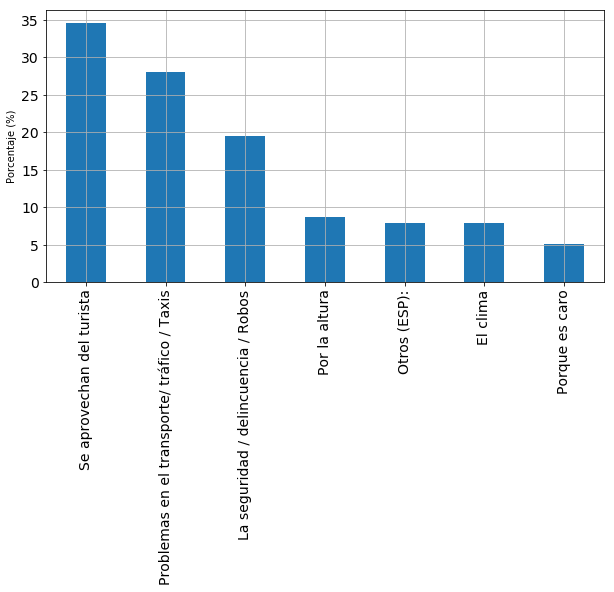

In [4]:
def get_55_2():
    n=len(data[data["P54"]==2])
    print("Muestra: ", n)
    df_P55_2 = data[[
    "P55_2_1",
    "P55_2_2",
    "P55_2_3",
    "P55_2_4",]].apply(pd.Series.value_counts)
    df_P55_2_values_sum=df_P55_2.sum(axis=1).sort_values()[::-1]
    df_P55_2_values=df_P55_2_values_sum[:113].rename(index={
        101:"Se aprovechan del turista",
        112:"Problemas en el transporte/ tráfico / Taxis",
        102:"La seguridad / delincuencia / Robos",
        104:"Por la altura",
        194:"Otros (ESP):",
        107:"El clima",
        113:"Porque es caro",
    })
    ((df_P55_2_values/n)*100).round(2).plot(
        kind='bar',
        grid=True,
        figsize=(10, 5),
        fontsize=14,
        title="").set(ylabel="Porcentaje (%)")
get_55_2()

### 62. ¿Qué edad tiene usted?

Muestra:  1548
Edad promedio:  40
min        15.000000
max        82.000000
count    1548.000000
mean       39.558786
Name: P62, dtype: float64


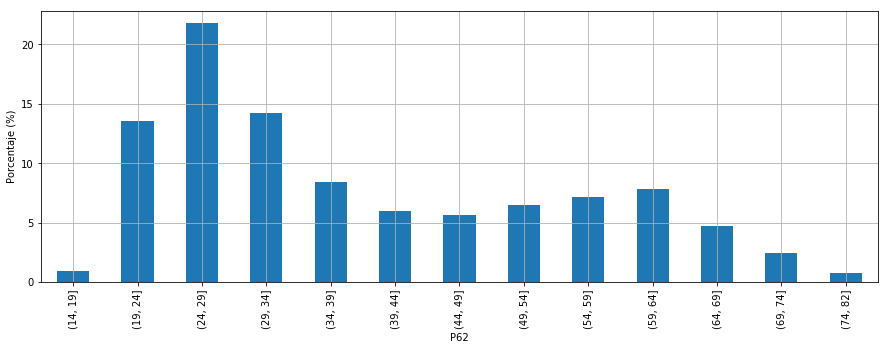

In [11]:
def get_62():
    n=len(data.P62)
    print("Muestra: ", n)
    print("Edad promedio: ",int(round(data['P62'].mean())) )
    print(data.P62.agg(["min","max","count","mean"]))
    #ranges = [14,24,34,44,54,64,74,82]
    ranges = [14,19,24,29,34,39,44,49,54,59,64,69,74,82]
    #ranges = [14,17,20,23,26,29,32,35,38,41,44,47,50,53,56,59,62,65,68,71,74,77,80,83]
    #ranges = [14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,82]
    #ranges = list(range(14,82))
    ((data.P62.groupby(pd.cut(data.P62, ranges)).count()/len(data.P62))*100).round(2).plot(
        kind="bar",
        figsize=(15, 5),
        grid=True).set(ylabel="Porcentaje (%)")
get_62()

### 63. Género

Muestra:  1548


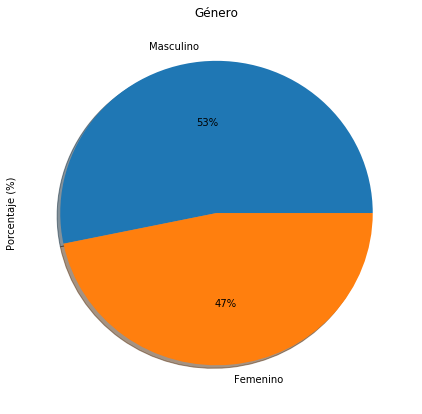

In [6]:
def get_62():
    n=len(data.P63)
    print("Muestra: ", n)
    genero=data.P63.value_counts().rename(index={1:'Masculino',2:'Femenino'})
    genero.plot(
        kind='pie',
        autopct='%.0f%%',
        figsize=(7, 7),
        shadow=True,
        title='Género').set(ylabel="Porcentaje (%)")
get_62()

###  64A. Según la siguiente tarjeta, (E: MOSTRAR TARJETA P64) ¿Cuál es su condición actual?

Muestra:  1548


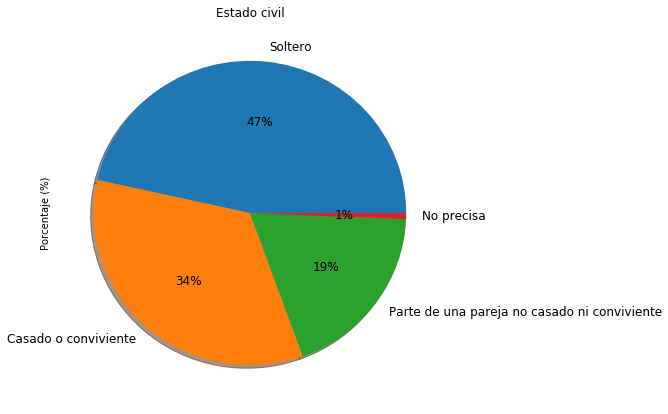

In [7]:
def get_64():
    n=len(data.P63)
    print("Muestra: ", n)
    estado_civil = data.P64A.value_counts().rename(index={
        1: 'Soltero', 
        2: 'Casado o conviviente', 
        3: 'Parte de una pareja no casado ni conviviente',
        99:'No precisa',
    })
    estado_civil.plot(
        kind='pie',
        autopct='%.0f%%',
        figsize=(7, 7),
        fontsize=12,
        title='Estado civil',
        shadow=True).set(ylabel="Porcentaje (%)")
get_64()

### 66. Según la siguiente tarjeta, ¿En cuál de las siguientes categorías se encuentra actualmente? (PROGRAMING: RESPUESTA UNICA)

Muestra:  1548


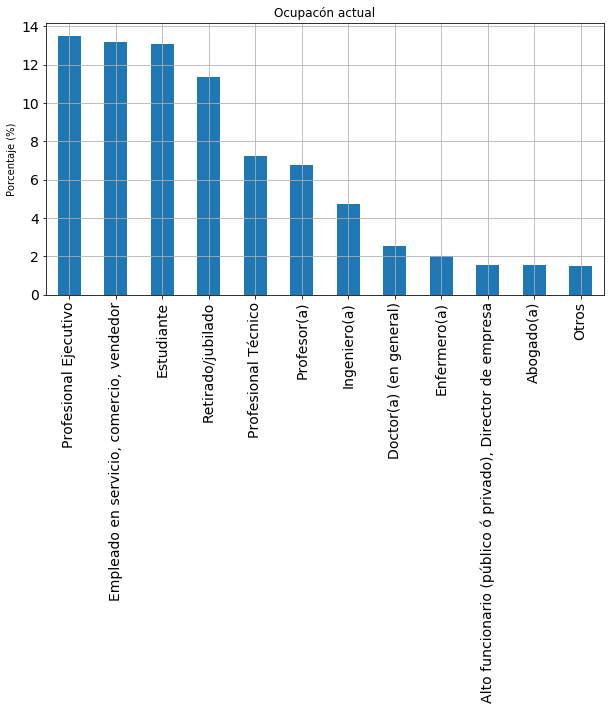

In [8]:
def get_66():
    n=len(data)
    print("Muestra: ", n)
    df_P66 =data.P66.value_counts()[:12].rename(index={
        2:"Profesional Ejecutivo",
        4:"Empleado en servicio, comercio, vendedor",
        7:"Estudiante",
        9:"Retirado/jubilado",
        3:"Profesional Técnico",
        10:"Profesor(a)",
        20:"Ingeniero(a)",
        91:"Doctor(a) (en general)",
        16:"Enfermero(a)",
        1:"Alto funcionario (público ó privado), Director de empresa",
        17:"Abogado(a)",
        94:"Otros",
    })
    ((df_P66/n)*100).round(2).plot(
        kind='bar',
        grid=True,
        figsize=(10, 5),
        fontsize=14,
        title="Ocupacón actual").set(ylabel="Porcentaje (%)")
get_66()

### 68. Según la siguiente tarjeta, (E: MOSTRAR TARJETA P68) Grado de instrucción más alto concluido 

Muestra:  1548


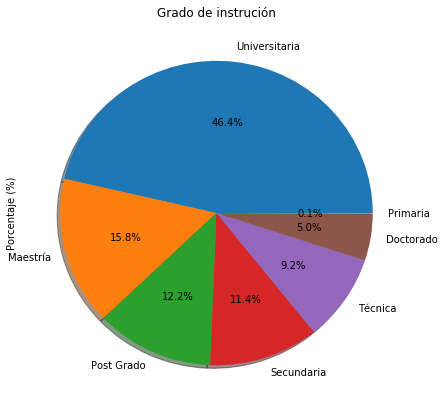

In [9]:
def get_68():
    n=len(data)
    print("Muestra: ", n)
    grado=data.P68.value_counts().rename(index={
    1:"Primaria",
    2:"Secundaria", 
    3:"Técnica", 
    4:"Universitaria", 
    5:"Post Grado",
    6:"Maestría",
    7:"Doctorado",  
    })
    grado.plot(
        kind='pie', 
        autopct='%.1f%%',
        figsize=(7, 7),
        shadow=True, 
        title='Grado de instrución').set(ylabel="Porcentaje (%)")
get_68()